In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [383]:
# importing the dataset
df=pd.read_csv('C:/Users/Lenovo/Downloads/Mall_Customers.csv')

In [384]:
df.shape

(200, 5)

In [385]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [386]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [387]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

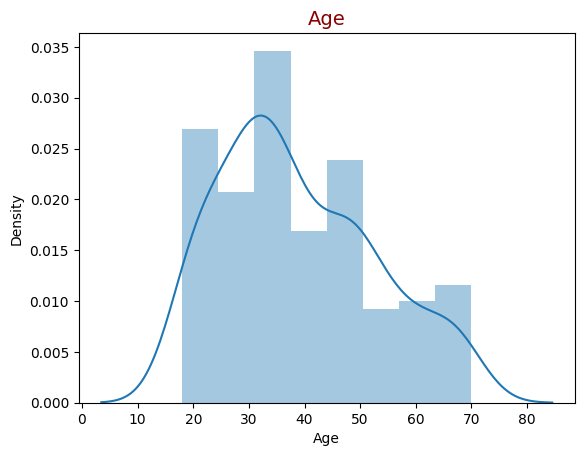

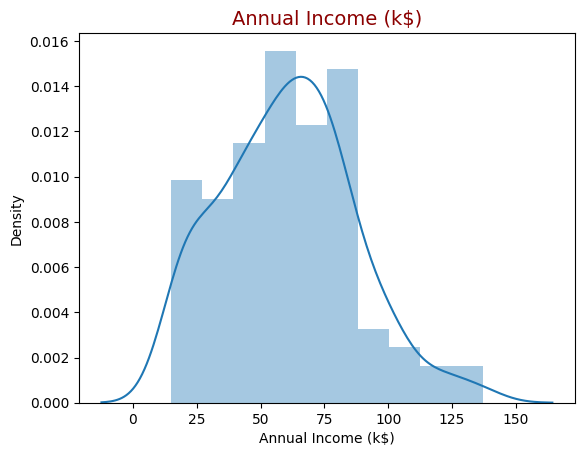

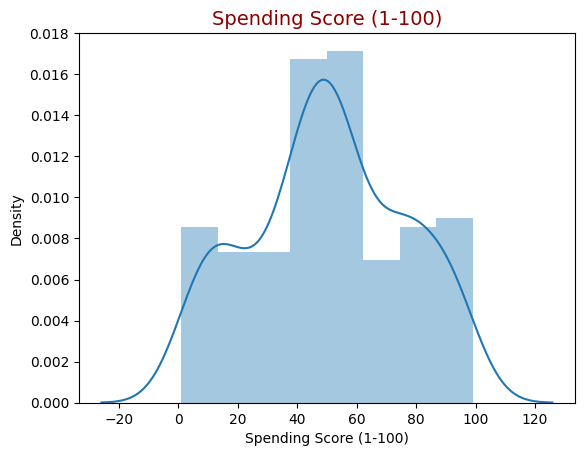

In [388]:
# distplots for numerical columns
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(i,fontsize=14,color='darkred')

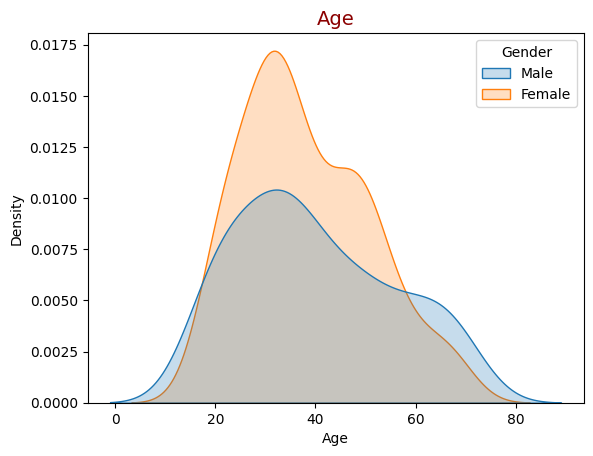

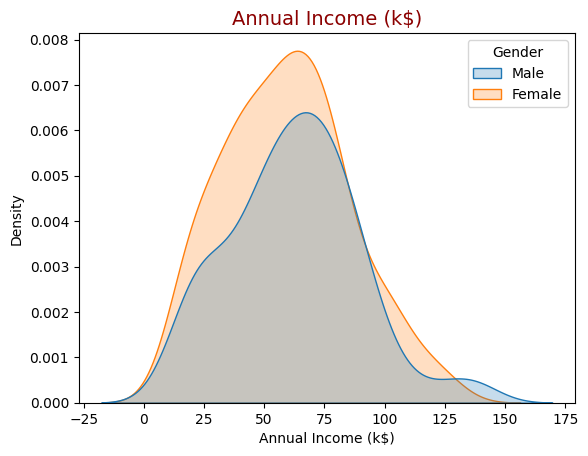

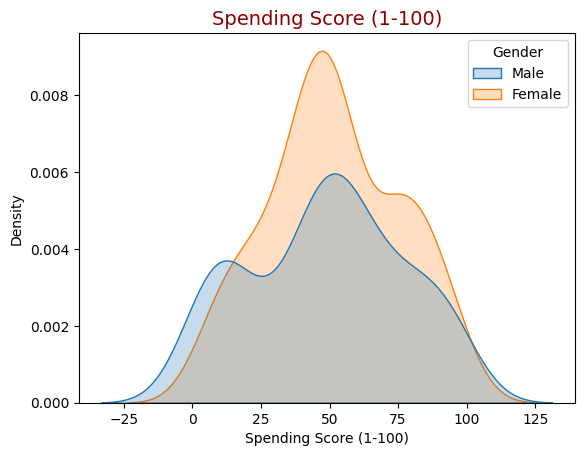

In [389]:
# kdeplot for numerical columns
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i,shade=True,hue=df['Gender']);
    plt.title(i,fontsize=14,color='darkred')

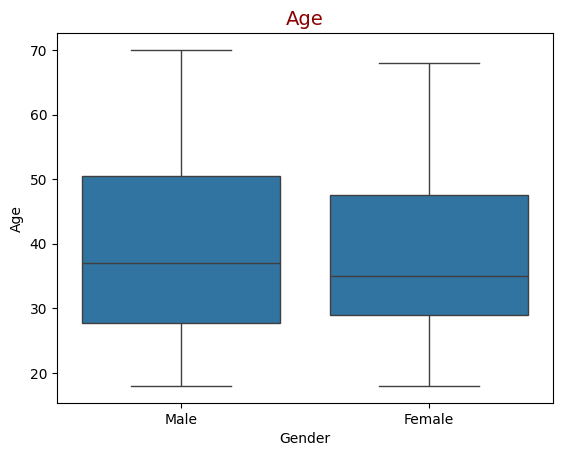

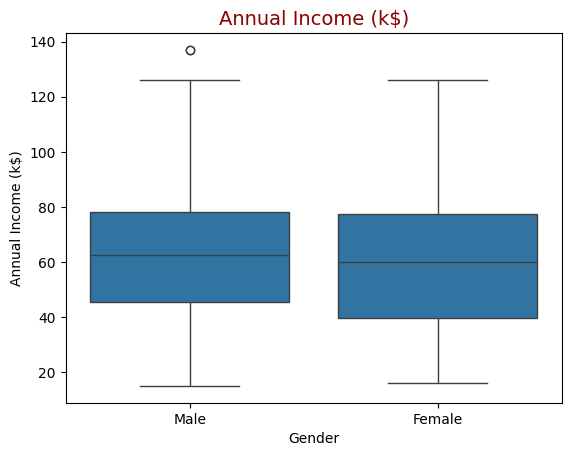

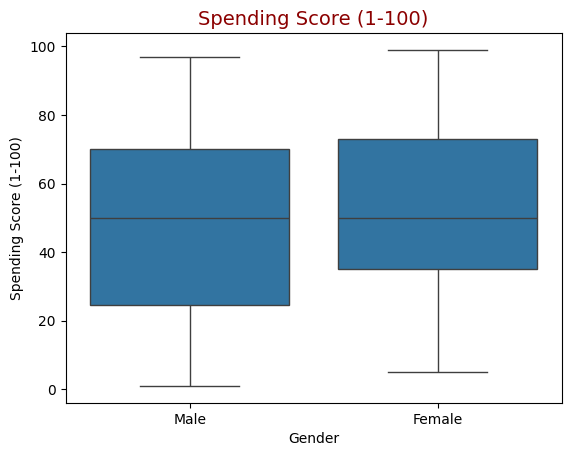

In [390]:
# box plot for numerical columns
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=i)
    plt.title(i,fontsize=14,color='darkred')

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

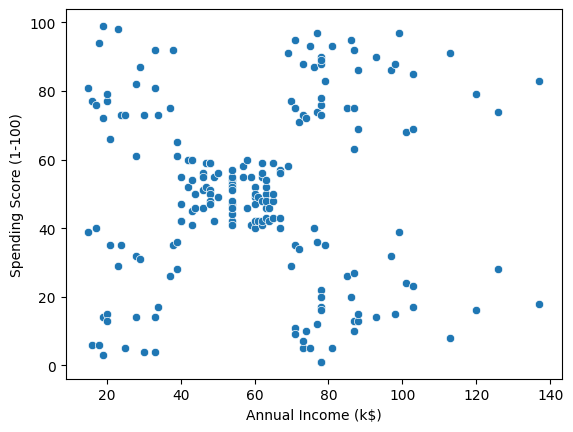

In [391]:
# scatterplot
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

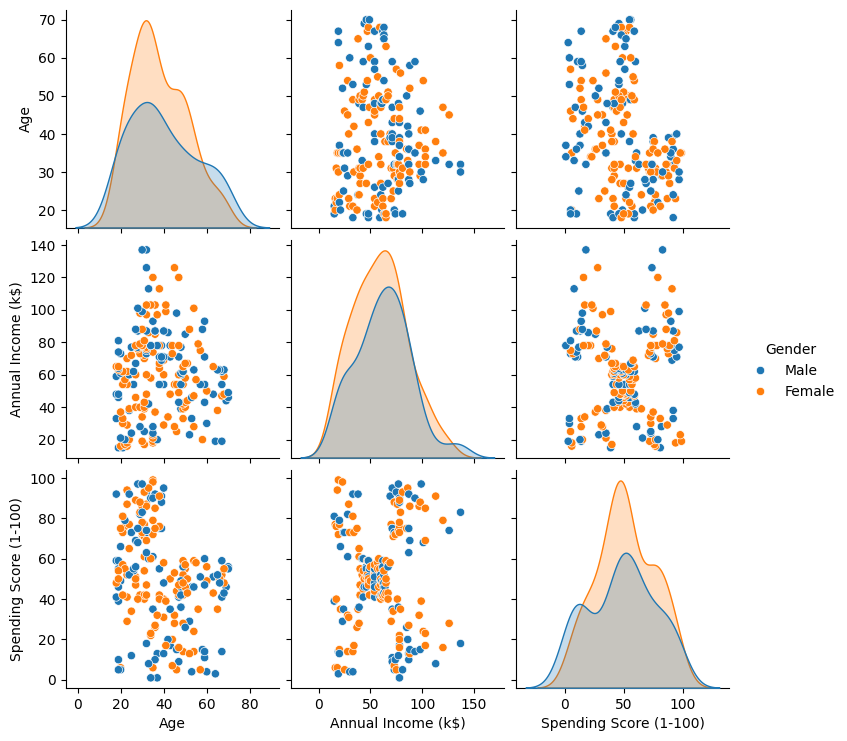

In [392]:
# dropping the columns CustomerID 
df=df.drop('CustomerID',axis=1)

# pairplot
sns.pairplot(df,hue="Gender")

In [393]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [394]:
# for correlation, datatype of each column should be integer
sample_df=df.select_dtypes(include=['number'])

In [395]:
# correlation
sample_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

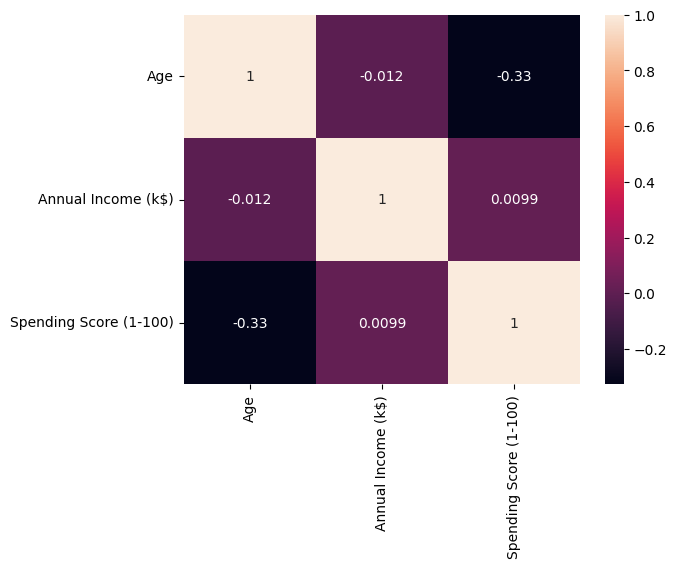

In [396]:
# plotting heatmap for the correlation analysis
sns.heatmap(sample_df.corr(),annot=True)

# Clustering Analysis
Involves three steps:
1. Initiate the algo
2. Fit the Data
3. Predict the label from fitted data

# Univariate Clustering Analysis on Annual Income

* Determining the optimal no. of clusters by Elbow Method

In [397]:
# inertia 
clustering1.inertia_

25341.285871863212

In [398]:
# determining inertia points
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [399]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 24361.259213759207,
 15460.429512270886,
 8675.385020242915,
 5081.484660267268,
 3984.9070593149554,
 3156.7884207295983,
 2300.169444444445,
 2463.1548451548456]

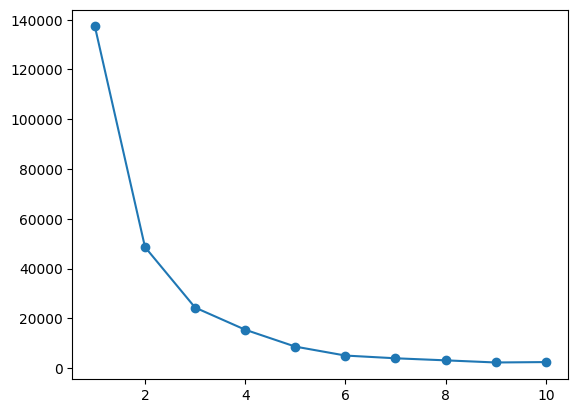

In [400]:
# plotting inertia points and finding the elbow point
plt.plot(range(1,11),inertia_scores,marker='o',markersize=6)

# clearly the elbow point is 3

* Building the Model

In [401]:
# Apply KMeans Clustering
clustering1=KMeans(n_clusters=3)

In [402]:
# fit the data
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [403]:
# predicting labels
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [404]:
df['Income Cluster'].value_counts()

Income Cluster
1    92
0    86
2    22
Name: count, dtype: int64

In [405]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,40.023256,36.348837,50.081395
1,38.065217,71.804348,49.880435
2,37.545455,108.181818,52.000000


# Univariate Clustering Analysis on Spending Score(1-100)

* Determining the optimal no. of clusters by Elbow Method

In [406]:
# inertia 
clustering2.inertia_

13894.874865814574

In [407]:
# determining inertia points
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

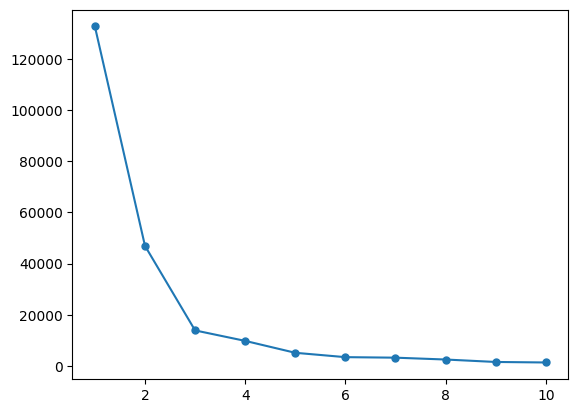

In [408]:
# plotting inertia and finding the elbow point
plt.plot(range(1,11),inertia_scores2,marker='o',markersize=5)

# clearly the elbow point is 3

* Building the model

In [409]:
# Apply KMeans Clustering
clustering2=KMeans(n_clusters=3)

In [410]:
# fit the data
clustering2.fit(df[['Spending Score (1-100)']])

KMeans(n_clusters=3)

In [411]:
# predicting the labels
clustering2.labels_
df['Spending Cluster']=clustering2.labels_

In [412]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster
0,Male,19,15,39,0,1
1,Male,21,15,81,0,0
2,Female,20,16,6,0,2
3,Female,23,16,77,0,0
4,Female,31,17,40,0,1


In [413]:
df['Spending Cluster'].value_counts()

Spending Cluster
1    94
0    59
2    47
Name: count, dtype: int64

In [414]:
df.groupby('Spending Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Cluster,,,
0,29.898305,64.847458,81.779661
1,42.414894,54.553191,48.180851
2,42.957447,67.191489,14.595745


In [415]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster
0,Male,19,15,39,0,1
1,Male,21,15,81,0,0
2,Female,20,16,6,0,2
3,Female,23,16,77,0,0
4,Female,31,17,40,0,1


# Bivariate Clustering Analysis on Annual Income & Spending Score(1-100)


* Determining the optimal number of clusters by Elbow Methood

In [416]:
# determining inertia 
clustering3.inertia_

44448.4554479337

In [417]:
# determining inertia points
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)

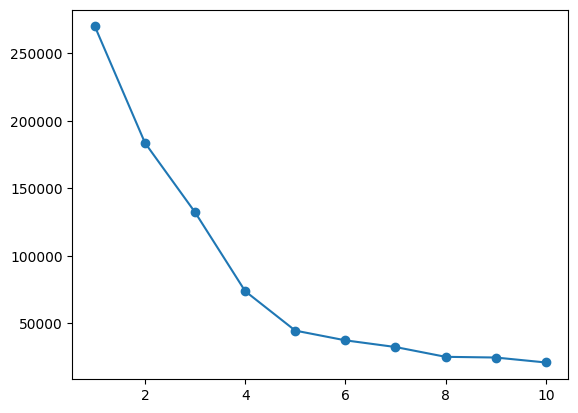

In [418]:
# plotting inertia points and finding the elbow point
plt.plot(range(1,11),inertia_scores3,marker='o',markersize=6)

# clearly the elbow point is 5

* Building the Model

In [419]:
# Apply KMeans Clustering
clustering3=KMeans(n_clusters=5)

In [420]:
# fit the data
clustering3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [421]:
# predicting the labels
clustering3.labels_
df['Spending and Income Cluster']=clustering3.labels_

In [422]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [423]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending Cluster', 'Spending and Income Cluster'],
      dtype='object')

In [424]:
# finding the centroid of clusters
centers=pd.DataFrame(clustering3.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

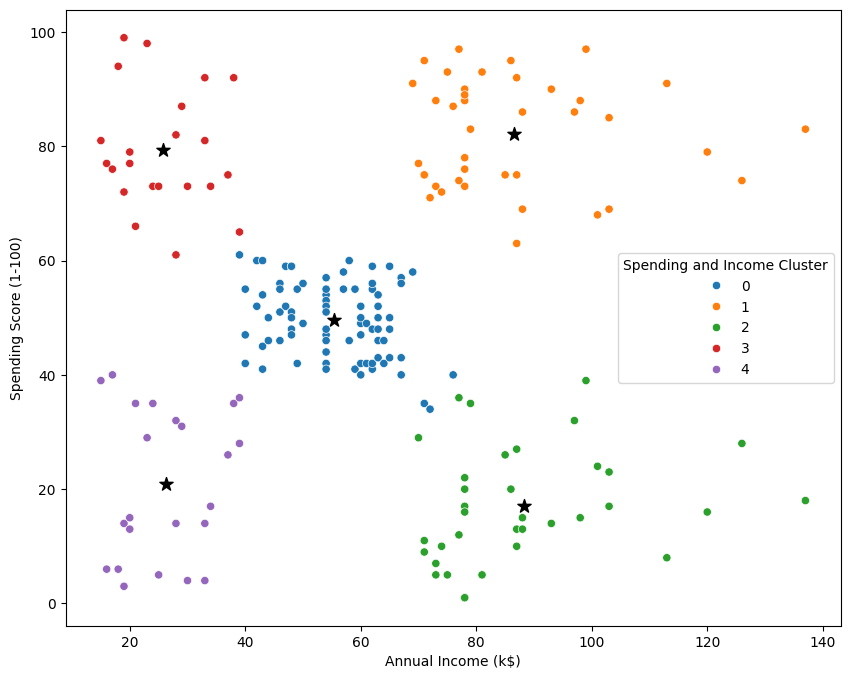

In [425]:

plt.figure(figsize=(10,8))
# plotting the centroids
plt.scatter(x=centers['x'],y=centers['y'],c='black',s=100,marker='*')

# plotting scatterplot b/w Annual Income and Spending Score.
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [426]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


# Multivariate Clustering Analysis

In [427]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [428]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Cluster,Spending and Income Cluster
0,Male,19,15,39,0,1,4
1,Male,21,15,81,0,0,3
2,Female,20,16,6,0,2,4
3,Female,23,16,77,0,0,3
4,Female,31,17,40,0,1,4


In [429]:
# converting categorical column Gender into numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [430]:
# feature selection
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [431]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

* Determining the optimal number of clusters using the elbow method

In [432]:

inertia_scores4= []
for i in range(1,11):
    kmeans4= KMeans(n_clusters=i)
    kmeans4.fit(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores4.append(kmeans4.inertia_)

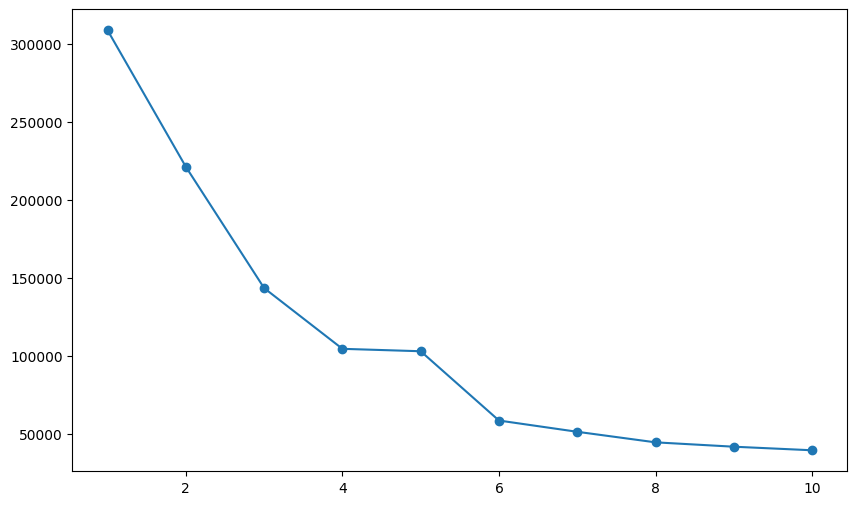

In [433]:
# Plot the inertia scores to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertia_scores4, marker='o', markersize=6)

#clearly the elbow point=6


* Building the model

In [434]:
# Apply K-Means clustering
clustering4=KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [435]:
# Perform PCA and reduce the data to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]
df['PCA3'] = principal_components[:, 2]

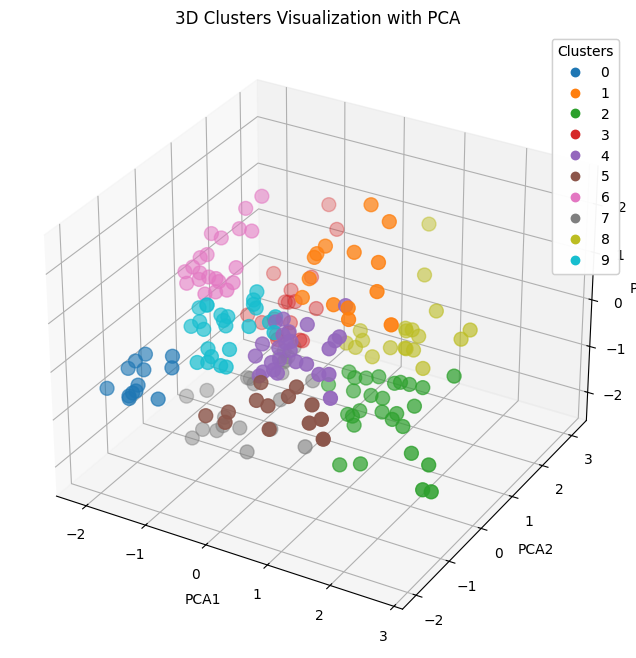

In [436]:
# Plot the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='tab10', s=100)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D Clusters Visualization with PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()